In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, WeightedRandomSampler
import torchvision.transforms as transforms
import torchvision.datasets as datasets

In [ ]:
import os

In [ ]:
my_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

In [ ]:
path = r'C:\Users\dines\OneDrive\Documents\torch-nlp\dataset'
dataset = datasets.ImageFolder(root=r'C:\Users\dines\OneDrive\Documents\torch-nlp\dataset', transform=my_transforms)
subdir = dataset.classes
class_weights = []
subdir

In [ ]:
for sdir in subdir:
    files = os.listdir(os.path.join(path, sdir))
    class_weights.append(1/len(files))

In [ ]:
sample_weight = [0]*len(dataset)

In [ ]:
len([label for data, label in dataset])
# for data, label in dataset:
#     print(label)

In [ ]:
class_weights

In [ ]:
def get_loader(root_dir, batch_size):
    my_transforms = transforms.Compose(
        [
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
        ]
    )

    dataset = datasets.ImageFolder(root=root_dir, transform=my_transforms)
    subdirectories = dataset.classes
    class_weights = []

    # loop through each subdirectory and calculate the class weight
    # that is 1 / len(files) in that subdirectory
    for subdir in subdirectories:
        files = os.listdir(os.path.join(root_dir, subdir))
        class_weights.append(1 / len(files))

    sample_weights = [0] * len(dataset)

    for idx, (data, label) in enumerate(dataset):
        class_weight = class_weights[label]
        sample_weights[idx] = class_weight

    sampler = WeightedRandomSampler(
        sample_weights, num_samples=len(sample_weights), replacement=True
    )

    loader = DataLoader(dataset, batch_size=batch_size, sampler=sampler)
    return loader


def main():
    loader = get_loader(root_dir=r"C:\Users\dines\OneDrive\Documents\torch-nlp\dataset", batch_size=8)

    num_retrievers = 0
    num_elkhounds = 0
    for epoch in range(10):
        for data, labels in loader:
            num_retrievers += torch.sum(labels == 0)
            num_elkhounds += torch.sum(labels == 1)

    print(num_retrievers.item())
    print(num_elkhounds.item())


if __name__ == "__main__":
    main()

In [ ]:
input_size = 28
hidden_size = 256
num_layers = 2
num_classes = 10
sequence_length = 28
learning_rate = 0.005
batch_size = 64
num_epochs = 3

# Recurrent neural network (many-to-one)
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size * sequence_length, num_classes)

    def forward(self, x):
        # Set initial hidden and cell states
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)

        # Forward propagate LSTM
        out, _ = self.rnn(x, h0)
        out = out.reshape(out.shape[0], -1)

        # Decode the hidden state of the last time step
        out = self.fc(out)
        return out

In [ ]:
train_dataset = datasets.MNIST(
    root="dataset/", train=True, transform=transforms.ToTensor(), download=True
)

In [ ]:
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

In [ ]:
for data, target in train_loader:
    print(data.shape, target.shape)
    break

In [ ]:
input_size = 28
num_layers = 2
hidden_size = 256
batch_size = 64
num_classes = 10
sequence_length = 28
num_epochs = 3
learning_rate = 0.005

In [ ]:
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size * sequence_length, num_classes)

In [ ]:
import torch

# Define a tensor with requires_grad=True to track computation with it
x = torch.tensor([3.0], requires_grad=True)

# Define a function y = x^2
y = x**2

# Compute gradients
y.backward()

# Print out the gradients
print(x.grad)


In [ ]:
import torch

x = torch.tensor([3.0], requires_grad=True)

y = x**2
y.backward()
print(x.grad)

In [ ]:
import torch

x = torch.tensor([2.0], requires_grad=True)

y = x**3 + 2*x + 1

y.backward()

print(x.grad)  # should output tensor([17.])


In [ ]:
import os  # when loading file paths
import pandas as pd  # for lookup in annotation file
import spacy  # for tokenizer
import torch
from torch.nn.utils.rnn import pad_sequence  # pad batch
from torch.utils.data import DataLoader, Dataset
from PIL import Image  # Load img
import torchvision.transforms as transforms

In [ ]:
import torch
from torch.nn.utils.rnn import pad_sequence
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as transforms

In [ ]:
spacy_eng = spacy.load("en_core_web_sm")

In [ ]:
if __name__ == "__main__":
    transform = transforms.Compose(
        [
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
        ]
    )

    loader, dataset = get_loader(
        "flickr8k/images/", "flickr8k/captions.txt", transform=transform
    )

    for idx, (imgs, captions) in enumerate(loader):
        print(imgs.shape)
        print(captions.shape)

In [ ]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

In [ ]:
p = r'C:\Users\dines\OneDrive\Documents\torch-nlp\intel_image_class\Flickr 8k Dataset\captions.txt'

In [ ]:
df = pd.read_csv(p)
df.head()

In [ ]:
imgs_id = len(list(df['image']))

In [ ]:
imgs_list = os.listdir(r"C:\Users\dines\OneDrive\Documents\torch-nlp\intel_image_class\Flickr 8k Dataset\images")

In [ ]:
# for i in imgs_list:
#     print(df[df['image'] == i])

In [ ]:
imgs_id/len(imgs_list)

In [ ]:
from PIL import Image

In [ ]:
Image.open(r'C:\Users\dines\OneDrive\Documents\torch-nlp\intel_image_class\Flickr 8k Dataset\images\1000268201_693b08cb0e.jpg')

In [ ]:
import torch
import torch.nn as nn

In [ ]:
# class RNN(nn.Module):
#     def __init__(self, input_size, hidden_size, num_layers, num_classes)
#         super(RNN, self).__init__()
#         self.
        

In [ ]:
import shutil

In [ ]:
path = r"C:\Users\dines\Music\Pytorch_image_classification\Cricket_Legends\Cricket_stars"

In [ ]:
min([len(os.listdir(os.path.join(path, i))) for i in os.listdir(path)])

In [ ]:
cricket_stars = os.listdir(path)
for fld in os.listdir(path):
    imgs_path = os.path.join(path, fld)
    files = shuffle(os.listdir(imgs_path))
    train_path = os.path.join(os.path.split(path)[0], 'train')
    if not os.path.isdir(train_path):
        os.mkdir(train_path)
        [os.mkdir(os.path.join(train_path, i)) for i in cricket_stars]
    [shutil.copy(i, os.path.join(train_path, fld)) for i in [os.path.join(imgs_path, i) for i in files[:100]]]
    test_path = os.path.join(os.path.split(path)[0], 'test')
    if not os.path.isdir(test_path):
        os.mkdir(test_path)
        [os.mkdir(os.path.join(test_path, i)) for i in cricket_stars]
    [shutil.copy(i, os.path.join(test_path, fld)) for i in [os.path.join(imgs_path, i) for i in files[100:140]]]
    val_path = os.path.join(os.path.split(path)[0], 'val')
    if not os.path.isdir(val_path):
        os.mkdir(val_path)
        [os.mkdir(os.path.join(val_path, i)) for i in cricket_stars]
    [shutil.copy(i, os.path.join(val_path, fld)) for i in [os.path.join(imgs_path, i) for i in files[140:]]]

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
import torchvision.transforms as transforms

In [ ]:
input_size = 28
hidden_size = 256
num_layers = 2
num_classes = 10
sequence_length = 28
learning_rate = 0.005
batch_size = 64
epochs = 3

In [ ]:
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size * sequence_length, num_classes)

    def forward(self, x):
        # Set initial hidden and cell states
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)

        # Forward propagate LSTM
        out, _ = self.rnn(x, h0)
        out = out.reshape(out.shape[0], -1)

        # Decode the hidden state of the last time step
        out = self.fc(out)
        return 

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size * sequence_length, num_classes)
        
    def forward(self, X):
        h0 = torch.randn(self.num_layers, x.size(0), self.hidden_size).to(device)
        out, _ = self.rnn(x, h0)
        out = out.reshape(out.shape[0], -1)
        out = self.fc(out)
        return

In [ ]:
class RNN_LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(RNN_LSTM, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size * sequence_length, num_classes)

    def forward(self, x):
        # Set initial hidden and cell states
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)

        # Forward propagate LSTM
        out, _ = self.lstm(
            x, (h0, c0)
        )  # out: tensor of shape (batch_size, seq_length, hidden_size)
        out = out.reshape(out.shape[0], -1)

        # Decode the hidden state of the last time step
        out = self.fc(out)
        return 

In [ ]:
class RNN_LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(RNN_LSTM, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        
        

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
import torchvision.transforms as transforms

In [ ]:
train = datasets.MNIST(root='/datasets', train=True, transform=transforms.ToTensor() ,download=True)
test = datasets.MNIST(root='datasets', train=False, transform=transforms.ToTensor(), download=True)

In [ ]:
train_load = DataLoader(train, batch_size=64, shuffle=True)
test_load = DataLoader(test, batch_size=64, shuffle=True)

In [ ]:
for images, labels in train_load:
    print(images.shape, labels.shape)
    break

In [ ]:
input_size = 28
hidden_size = 256
num_layers = 2
num_classes = 10
sequence_length = 28
learning_rate = 0.005
batch_size = 64
num_epochs = 3


In [ ]:
input_size = 28
hidden_size = 256
num_layers = 2
num_classes = 10
sequence_length = 28
learning_rate = 0.001
batch_size = 64
num_epochs = 3

In [ ]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def remove_url(text): 
    url_pattern  = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    return url_pattern.sub(r'', text)

def clean_text(text ):
    words = text.translate(str.maketrans('', '', string.punctuation)).split()
    words = ' '.join([w for w in words if not w.isdigit() and len(w)>2])
    return words.lower()


In [ ]:
import pandas as pd
import re, string
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from collections import Counter

import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator

In [ ]:
def processingText(data, type='train'):
    df = pd.read_csv(data)
    df.dropna(axis=0, how='any', inplace=True)
    df['len_text'] = df['text'].apply(lambda x: len(str(x).split()))
    df = df[df['len_text']>2]
    print('-------------------------')
    print(df['sentiment'].value_counts())
    # mask = df['len_text']>2
    # df = df[mask]
    train_seq_len = df['len_text'].max()
    print("\nLength of {} text: ".format(type), df['len_text'].max())
    df['text'] = df['text'].apply(remove_emoji)
    df['text'] = df['text'].apply(remove_url)
    df['text'] = df['text'].apply(clean_text)
    le = LabelEncoder()
    df['labels'] = le.fit_transform(df['sentiment'])
    return df

In [ ]:
train_data = processingText(r"C:/Users/dines/Music/Work/pytorch_practice/PyTorchTweetTextClassification/train.csv")
test_data = processingText(r"C:/Users/dines/Music/Work/pytorch_practice/PyTorchTweetTextClassification/test.csv", 'test')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_data['text'].tolist(), train_data['labels'].tolist(), test_size=0.2, stratify=train_data['labels'].tolist(), random_state=0)

In [ ]:
print('Train data len:'+str(len(X_train)))
print('Class distribution'+str(Counter(y_train)))


print('Valid data len:'+str(len(X_test)))
print('Class distribution'+ str(Counter(y_test)))

print('Test data len:'+str(len(test_data['text'].tolist())))
print('Class distribution'+ str(Counter(test_data['labels'].tolist())))

In [ ]:
train_data = list(zip(X_train, y_train))
val_data = list(zip(X_test, y_test))
test_data = list(zip(test_data['text'].tolist(), test_data['labels'].tolist()))

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator

tokenizer = get_tokenizer('basic_english')
def yield_token(data):
    for text, _ in data:
        yield tokenizer(text)


vocab = build_vocab_from_iterator(yield_token(train_data), specials=['<unk>'])
vocab.set_default_index(vocab['<unk>'])
# vocab.get_stoi()

In [ ]:
text_pipeline = lambda x: vocab(tokenizer(x))
label_pipeline = lambda x: int(x)

In [ ]:
text_pipeline('hi there how are you')

In [ ]:
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator

tokenizer = get_tokenizer('basic_english')

def yield_token(data):
    for text, _ in data:
        yield tokenizer(text)
        
vocab = build_vocab_from_iterator(yield_token(train_data), specials=['<unk>'])
vocab.set_default_index(vocab['<unk>'])


In [ ]:
text_pipeline = lambda x: vocab(tokenizer(x))
label_pipeline = lambda x: int(x)

text_pipeline('are you there')

In [ ]:
from torch import nn
import torch.nn.functional as F

class TextClassificationModel(nn.Module):

    def __init__(self, vocab_size, embed_dim, num_class):
        super(TextClassificationModel, self).__init__()
        self.embedding = nn.EmbeddingBag(vocab_size, embed_dim, sparse=True)
        self.fc1 = nn.Linear(embed_dim,64)
        self.fc2 = nn.Linear(64,16)
        self.fc3 = nn.Linear(16, num_class)
        self.init_weights()

    def init_weights(self):
        initrange = 0.5
        self.embedding.weight.data.uniform_(-initrange, initrange)
        self.fc1.weight.data.uniform_(-initrange, initrange)
        self.fc1.bias.data.zero_()
        self.fc2.weight.data.uniform_(-initrange, initrange)
        self.fc2.bias.data.zero_()
        self.fc3.weight.data.uniform_(-initrange, initrange)
        self.fc3.bias.data.zero_()

    def forward(self, text, offsets):
        embedded = self.embedding(text, offsets)
        x = F.relu(self.fc1(embedded))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:
class TextClassificationModel(nn.Module):
    def __init__(self, vocab_size, embed_dim, num_classes):
        super(TextClassificationModel, self)
        self.embedding = nn.Embedding

In [ ]:
import torch, os
import torch.nn as nn
from torch.utils.data import DataLoader, WeightedRandomSampler
import torchvision.transforms as transforms
import torchvision.datasets as datasets

In [ ]:
path = r"C:\Users\dines\Music\Work\pytorch_practice\imbalanced_dataset\dataset"

In [ ]:
my_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

In [ ]:
dataset = datasets.ImageFolder(root=path, transform=my_transform)

In [ ]:
dirs = dataset.classes

In [ ]:
class_weights = []
for subdir in dirs:
    files = os.listdir(os.path.join(path, subdir))
    class_weights.append(1/len(files))
class_weights

In [ ]:
sample_weights = [0]*len(dataset)

In [ ]:
class_weights

In [ ]:
for idx, (data, labels) in enumerate(dataset):
    class_weight = class_weights[labels]
    sample_weights[idx] = class_weight

In [ ]:
path = r"C:\Users\dines\Music\Work\pytorch_practice\imbalanced_dataset\dataset"

In [ ]:
import torch, os
import torch.nn as nn
from torch.utils.data import DataLoader, WeightedRandomSampler
import torchvision.transforms as transforms
import torchvision.datasets as datasets

In [ ]:
my_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

In [ ]:
dataset = datasets.ImageFolder(root=path, transform=my_transform)

In [ ]:
folds = dataset.classes

In [ ]:
class_weights = []
for sub_fold in folds:
    files = os.listdir(os.path.join(path, sub_fold))
    class_weights.append(1/len(files))

In [ ]:
sample_weights = [0]*len(dataset)

In [ ]:
for idx, (data, label) in enumerate(dataset):
    class_weight = class_weights[label]
    sample_weights[idx] = class_weight

In [ ]:
sampler = WeightedRandomSampler(sample_weights, num_samples=len(sample_weights), replacement=True)

In [ ]:
loader = DataLoader(dataset=dataset, batch_size=8, sampler=sampler)

In [ ]:
num_retrivers = 0
num_elkonds = 0
for epoch in range(10):
    for data, label in loader:
        num_retrivers += torch.sum(label == 0)
        num_elkonds += torch.sum(label == 1)

In [ ]:
num_retrivers

In [ ]:
num_elkonds

In [ ]:
import torch

x = torch.randn(3, 4, requires_grad=True)  # create a non-scalar tensor with requires_grad=True
y = x**2 + 3*x + 1  # perform some operations on the tensor
z = y.mean()  # compute the mean of the tensor to obtain a scalar-valued tensor
grad_x = torch.autograd.grad(z, x)  # compute gradients of z with respect to x
print(grad_x)  # print gradients


In [ ]:
import torch

x = torch.randn(3, 4, requires_grad=True)
y = x**2 + 3*x + 1
z = y.mean()
grad_x = torch.autograd.grad(z, x)
print(grad_x)

In [ ]:
y = x**2 + 3*x + 1
# y.mean()
y

In [ ]:
[[1, 2, 3],
 [4, 5, 6],
 [7, 8, 9],]

In [31]:
import sys

sys.path.append(r"C:\Users\dines\Music\Work\pytorch_practice\captcha-recognition-pytorch")
import dataset

import torch
from glob import glob
import os, re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import config

In [5]:
image_files = glob(os.path.join(config.DATA_DIR, '*.png'))
list_targets = [re.split(r"\\|\.", img)[-2] for img in image_files]
targets = [[c for c in target] for target in list_targets]
flat_targets = [c for t in targets for c in t]
le = LabelEncoder()
le.fit(flat_targets)
le_enc = [le.transform(t) for t in targets]
le_enc = np.array(le_enc) + 1
(
    train_imgs,
    test_imgs,
    train_target,
    test_target,
    _,
    test_target_origin) = train_test_split(image_files, le_enc, list_targets, train_size=0.1, random_state=42)

train_dataset = dataset.ClassificationDataset(
    image_paths=train_imgs,
    targets=train_target,
    resize=(config.IMAGE_HEIGHT, config.IMAGE_WIDTH)
)

train_load = DataLoader(train_dataset, batch_size=config.BATCH_SIZE, shuffle=True, num_workers=config.NUM_WORKERS)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


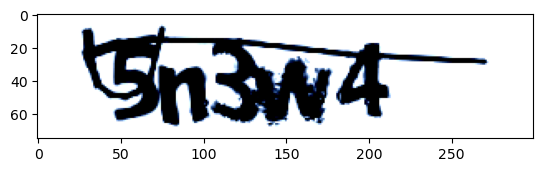

[ 4. 15.  2. 17.  3.]


In [40]:
plt.imshow(np.transpose(train_dataset[0]['images'].numpy(), (1, 2, 0)))
plt.show()
print(train_dataset[0]['targets'].numpy())

In [79]:
# for data in tqdm(train_load):
#     for images, targets in data.items():
#         print(images, targets)
#         break
#     break

In [67]:
# tk0 = tqdm(train_load, total=len(train_load))

In [89]:
# Define the model
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.linear = nn.Linear(10, 5)
    
    def forward(self, x):
        out = self.linear(x)
        return out

# Define the loss function
criterion1 = nn.CrossEntropyLoss()
criterion2 = nn.NLLLoss()

# Define the input and target
x = torch.randn(3, 10)
y = torch.tensor([1, 3, 2])

# Compute the loss using nn.CrossEntropyLoss
output = Model()(x)
loss1 = criterion1(output, y)
print(loss1)

# Compute the loss using nn.NLLLoss
log_prob = nn.LogSoftmax(dim=1)(output)
loss2 = criterion2(log_prob, y)
print(loss2)


tensor(1.8332, grad_fn=<NllLossBackward0>)
tensor(1.8332, grad_fn=<NllLossBackward0>)


In [113]:
import torch.nn as nn

class Model(nn.Module):
    def __init__(self,):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(10, 5)
        
    def forward(self, x):
        out = self.fc1(x)
        return out

x = torch.randn(3, 10)
y = torch.tensor([1, 2, 3])

criterion1 = nn.CrossEntropyLoss()
criterion2 = nn.NLLLoss()

output = Model()(x)
print(criterion1(output, y))

nn.Log

tensor(1.6112, grad_fn=<NllLossBackward0>)

In [112]:
output

tensor([[ 0.2313,  0.6508,  0.4546,  0.6110, -0.0449],
        [ 0.0241,  0.1521, -0.0199,  0.7970, -0.2015],
        [-0.2117,  0.1482,  0.8465, -1.3221, -0.6621]],
       grad_fn=<AddmmBackward0>)

In [119]:
torch.randint(1, 20, (1, 5))

tensor([[14,  4,  7,  1, 14]])

In [137]:
x = torch.randn([1, 64, 18, 75])
print(x.shape)
x = x.view(1, x.size(1), -1)
print(x.shape)
x.transpose(1, 2).shape

torch.Size([1, 64, 18, 75])
torch.Size([1, 64, 1350])


torch.Size([1, 1350, 64])

In [166]:
x = torch.randn([1, 64, 18, 75])
print(x.shape)
x = x.permute(0, 3, 1, 2)
print(x.shape)
x.view(1, x.size(1), -1).shape

torch.Size([1, 64, 18, 75])
torch.Size([1, 75, 64, 18])


torch.Size([1, 75, 1152])

In [167]:
nn.CrossEntropyLoss

torch.nn.modules.loss.CrossEntropyLoss

torch.Size([1, 128, 75, 300])
torch.Size([1, 128, 37, 150])
torch.Size([1, 64, 37, 150])
torch.Size([1, 64, 18, 75])


In [180]:
1. I want one window with user changeable, based on requirement.
2. I want 2 text fields along with 2 choose file buttons, text fields and choose file buttons sizes should be user changeable based on their requirement, I want these choose file buttons should be right side of every text field, whenever user choose any file, file should be visible in text fields.
3. after those 2 text fields, I want separate line like (----------------------) for next text fields and other elements.
4. after line separate, I want 4 more text fields with 4 more choose file buttons, sizes should be user changeable based on their requirement, I want these choose file buttons should be right side of every text field, whenever user choose any file, file should be visible in text fields.
5. I want 3 different drop downs, I want left to right format, not top to down, size should be user changeable based on their requirement . 
6. 2 simple text areas with "ex1", "ex2", these should be left to right format, size should be user changeable based on their requirement . 
7. I need 2 buttons, one is "Skip" once user choose skip, window should be close without printing aything, other one is "Submit" If user choose Submit button, all values should be print which user has choose above.
8. Lastly, I want this window generating code in one class, that is "WindowGenerating" class, I want other class name is "Main", I want to inherit "WindowGenerating" to "main" class, user should call "main" class and then window should appear

1350

In [274]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CaptchModel(nn.Module):
    def __init__(self, num_char):
        super(CaptchModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 128, kernel_size=(3, 3), padding=(1, 1))
        self.pool1 = nn.MaxPool2d(kernel_size=(2, 2))
        self.conv2 = nn.Conv2d(128, 64, kernel_size=(3, 3), padding=(1, 1))
        self.pool2 = nn.MaxPool2d(kernel_size=(2, 2))
        self.fc1 = nn.Linear(1152, 64)
        self.drop = nn.Dropout(0.2)
        self.lstm = nn.GRU(64, 32, bidirectional=True, dropout=0.25, batch_first=True)
        self.fc2 = nn.Linear(64, num_char+1)
        
    def forward(self, images, targets):
        btch, channels, height, width = images.size()
        x = self.conv1(images)
        print(x.size())
        x = self.pool1(x)
        print(x.size())
        x = self.conv2(x)
        print(x.size())
        x = self.pool2(x)
        print(x.size())
        x = x.permute(0, 3, 1, 2)
        print(x.size())
        x = x.view(btch, x.size(1), -1)
        print(x.size())
        x = F.relu(self.fc1(x))
        print(x.size())
        x = self.drop(x)
        print(x.size())
        x, _ = self.lstm(x)
        print(x.size())
        x = F.relu(self.fc2(x))
        print(x.size())
        x = x.permute(1, 0, 2)
        print(x.size())
        if targets is not None:
            log_prob = F.log_softmax(x, 2)
            print(log_prob.size())
            input_lengths = torch.full(size=(btch, ), fill_value=log_prob.size(0), dtype=torch.int32
            )
            print(input_lengths)
        return x, None

if __name__ == "__main__":
    cm = CaptchModel(19)
    images = torch.randn(1, 3, 75, 300)
    targets = torch.randint(1, 20, (1, 19))
    cm(images, targets)

torch.Size([1, 128, 75, 300])
torch.Size([1, 128, 37, 150])
torch.Size([1, 64, 37, 150])
torch.Size([1, 64, 18, 75])
torch.Size([1, 75, 64, 18])
torch.Size([1, 75, 1152])
torch.Size([1, 75, 64])
torch.Size([1, 75, 64])
torch.Size([1, 75, 64])
torch.Size([1, 75, 20])
torch.Size([75, 1, 20])
torch.Size([75, 1, 20])
tensor([75], dtype=torch.int32)


In [278]:
import torch
import torch.nn as nn

# Define the input and output sequences
input_seq = torch.randn(32, 20, 80) # batch_size x input_seq_len x num_features
output_seq = torch.randint(low=0, high=28, size=(32, 15)) # batch_size x output_seq_len

# Define the CTC loss function
ctc_loss = nn.CTCLoss()

# Compute the CTC loss
output_seq_lengths = torch.full(size=(32,), fill_value=15, dtype=torch.int32) # output_seq_lengths[i] is the length of output_seq[i]
input_seq_lengths = torch.full(size=(32,), fill_value=20, dtype=torch.int32) # input_seq_lengths[i] is the length of input_seq[i]
loss = ctc_loss(input_seq, output_seq, output_seq_lengths, input_seq_lengths)

print(loss)


RuntimeError: input_lengths must be of size batch_size

In [348]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CaptchModel(nn.Module):
    def __init__(self, num_char):
        super(CaptchModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 128, kernel_size=(3, 3), padding=(1, 1))
        self.pool1 = nn.MaxPool2d(kernel_size=(2, 2))
        self.conv2 = nn.Conv2d(128, 64, kernel_size=(3, 3), padding=(1, 1))
        self.pool2 = nn.MaxPool2d(kernel_size=(2, 2))
        self.fc1 = nn.Linear(1152, 64)
        self.drop1 = nn.Dropout(0.2)
        self.lstm = nn.GRU(64, 32, bidirectional=True, dropout=0.25, num_layers=2, batch_first=True)
        self.fc2 = nn.Linear(64, num_char+1)
    
    def forward(self, images, targets):
        btch, channels, height, width = images.size()
        x = self.conv1(images)
        print(x.size())
        x = self.pool1(x)
        print(x.size())
        x = self.conv2(x)
        print(x.size())
        x = self.pool2(x)
        print(x.size())
        x = x.permute(0, 3, 1, 2)
        print(x.size())
        x = x.view(btch, x.size(1), -1)
        print(x.size())
        x = F.relu(self.fc1(x))
        print(x.size())
        x = self.drop1(x)
        print(x.size())
        x, _ = self.lstm(x)
        print(x.size())
        x = self.fc2(x) 
        print(x.size())
        x = x.permute(1, 0, 2)
        print(x.size())
        if targets is not None:
            log_probs = F.log_softmax(x, 2)
            input_lengths = torch.full(
                size=(btch,), fill_value=log_probs.size(0), dtype=torch.int32
            )
            target_lengths = torch.full(
                size=(btch,), fill_value=targets.size(1), dtype=torch.int32
            )
            loss = nn.CTCLoss(blank=0)(
                log_probs, targets, input_lengths, target_lengths
            )
            return x, loss
        return x, None

cm = CaptchModel(19)
images = torch.randn(1, 3, 75, 300)
targets = torch.randint(1, 20, (1, 19))
x, loss = cm(images, targets)

torch.Size([1, 128, 75, 300])
torch.Size([1, 128, 37, 150])
torch.Size([1, 64, 37, 150])
torch.Size([1, 64, 18, 75])
torch.Size([1, 75, 64, 18])
torch.Size([1, 75, 1152])
torch.Size([1, 75, 64])
torch.Size([1, 75, 64])
torch.Size([1, 75, 64])
torch.Size([1, 75, 20])
torch.Size([75, 1, 20])


In [347]:
import torch
from torch import nn
from torch.nn import functional as F


class CaptchaModel(nn.Module):
    def __init__(self, num_chars):
        super(CaptchaModel, self).__init__()
        self.conv_1 = nn.Conv2d(3, 128, kernel_size=(3, 3), padding=(1, 1))
        self.pool_1 = nn.MaxPool2d(kernel_size=(2, 2))
        self.conv_2 = nn.Conv2d(128, 64, kernel_size=(3, 3), padding=(1, 1))
        self.pool_2 = nn.MaxPool2d(kernel_size=(2, 2))
        self.linear_1 = nn.Linear(1152, 64)
        self.drop_1 = nn.Dropout(0.2)
        self.lstm = nn.GRU(64, 32, bidirectional=True, num_layers=2, dropout=0.25, batch_first=True)
        self.output = nn.Linear(64, num_chars + 1)

    def forward(self, images, targets=None):
        bs, _, _, _ = images.size()
        x = F.relu(self.conv_1(images))
        print(x.size())
        x = self.pool_1(x)
        print(x.size())
        x = F.relu(self.conv_2(x))
        print(x.size())
        x = self.pool_2(x)
        print(x.size())
        x = x.permute(0, 3, 1, 2)
        print(x.size())
        x = x.view(bs, x.size(1), -1)
        print(x.size())
        x = F.relu(self.linear_1(x))
        print(x.size())
        x = self.drop_1(x)
        print(x.size())
        x, _ = self.lstm(x)
        print(x.size())
        x = self.output(x)
        print(x.size())
        x = x.permute(1, 0, 2)
        print(x.size())

        if targets is not None:
            log_probs = F.log_softmax(x, 2)
            input_lengths = torch.full(
                size=(bs,), fill_value=log_probs.size(0), dtype=torch.int32
            )
            print(input_lengths)
            target_lengths = torch.full(
                size=(bs,), fill_value=targets.size(1), dtype=torch.int32
            )
            print(target_lengths)
            loss = nn.CTCLoss(blank=0)(
                log_probs, targets, input_lengths, target_lengths
            )
            return x, loss
        
        if targets is not None:
            F.log_softmax
        
        return x, None
        

if __name__ == "__main__":
    cm = CaptchaModel(19)
    img = torch.rand((5, 3, 75, 300))
    targets = torch.randint(1, 20, (5, 5))
    x, _ = cm(img, targets)


torch.Size([5, 128, 75, 300])
torch.Size([5, 128, 37, 150])
torch.Size([5, 64, 37, 150])
torch.Size([5, 64, 18, 75])
torch.Size([5, 75, 64, 18])
torch.Size([5, 75, 1152])
torch.Size([5, 75, 64])
torch.Size([5, 75, 64])
torch.Size([5, 75, 64])
torch.Size([5, 75, 20])
torch.Size([75, 5, 20])
tensor([75, 75, 75, 75, 75], dtype=torch.int32)
tensor([5, 5, 5, 5, 5], dtype=torch.int32)


In [346]:
# torch.randint(1, 20, (5, 5))